In [1]:
import matplotlib.pyplot as plt
import sys

In [2]:
def graph(n, to_ignore=[], broadcast=[]):
    timings = []
    min_delivered = sys.maxsize
    for i in range(n):
        with open(f'logs/proc{i+1:02}.stderr', 'r') as f:
            lines = f.readlines()
        ms = [int(l.strip())*1e-3 for l in lines]

        p = plt.plot([x/1e6 for x in ms], range(len(ms)))
        if broadcast:
            plt.axvline(x=broadcast[i], color=p[0].get_color())
        timings.append(ms[-1]/len(ms))
        if i+1 not in to_ignore:
            min_delivered = min(len(ms), min_delivered)
    mean_timing = sum(timings)/len(timings)
    unit = 'µs'
    if mean_timing / 1000 > 1:
        mean_timing /= 1000
        unit = 'ms'
    print(f' - {mean_timing:.4} {unit} per delivered message (min. {min_delivered} messages delivered)')

 - 6.05 µs per delivered message (min. 3541725 messages delivered)


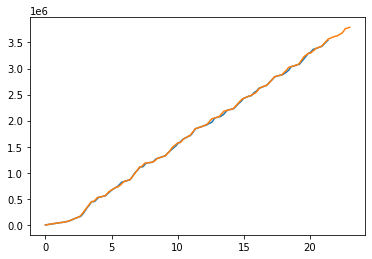

In [395]:
graph(2)

 - 424.9 µs per delivered message (min. 200000 messages delivered)


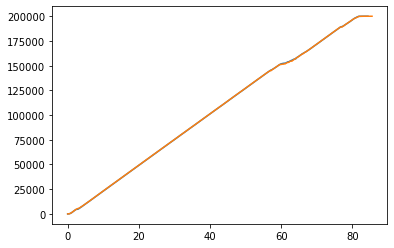

In [363]:
graph(2)

 - 507.2 µs per delivered message (min. 32298 messages delivered)


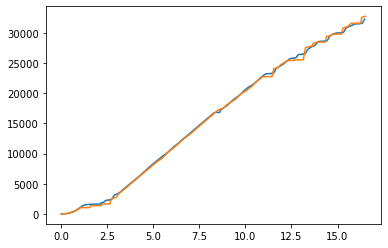

In [409]:
graph(2)

 - 5.456 ms per delivered message (min. 50000 messages delivered)


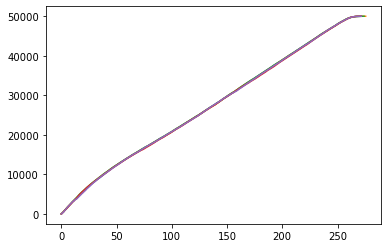

In [345]:
graph(5)